# Simulating brain circuit stimulation

## Import libraries

For this model, we will be using Numpy and Matplotlib.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Setting constants and characteristics

It is generally good to _initialize_ all of the repeatedly used variables at the beginning--so that's what I will do.

In [10]:
# parameters
a = .02
b = .2
c = -50
d = 2

#constants
c1 = .04
c2 = 5
c3 = 140

#initial membrane voltage
v = -65

# recovery variable
u = b*v

## Apply model to 1 cell

In [11]:
# create time
time = 1000

# create empty membrane voltage vector
membrane_voltage = np.zeros(time)

# create scalar for each time point
I_all = np.zeros(time)

# loop over time
for i in range(time):
    # define input strength at timepoints
    I = -2 if (i > 200) & (i < 400) else 7
    # check action potential
    if v >= 30:
        v = c
        u += d
    #update membrane variables
    v += c1*v**2 + c2*v + c3 - u + I
    u += a*(b*v - u)
    # collects vars
    membrane_voltage[i] = v
    I_all[i] = I
    

## Plotting 1 cell

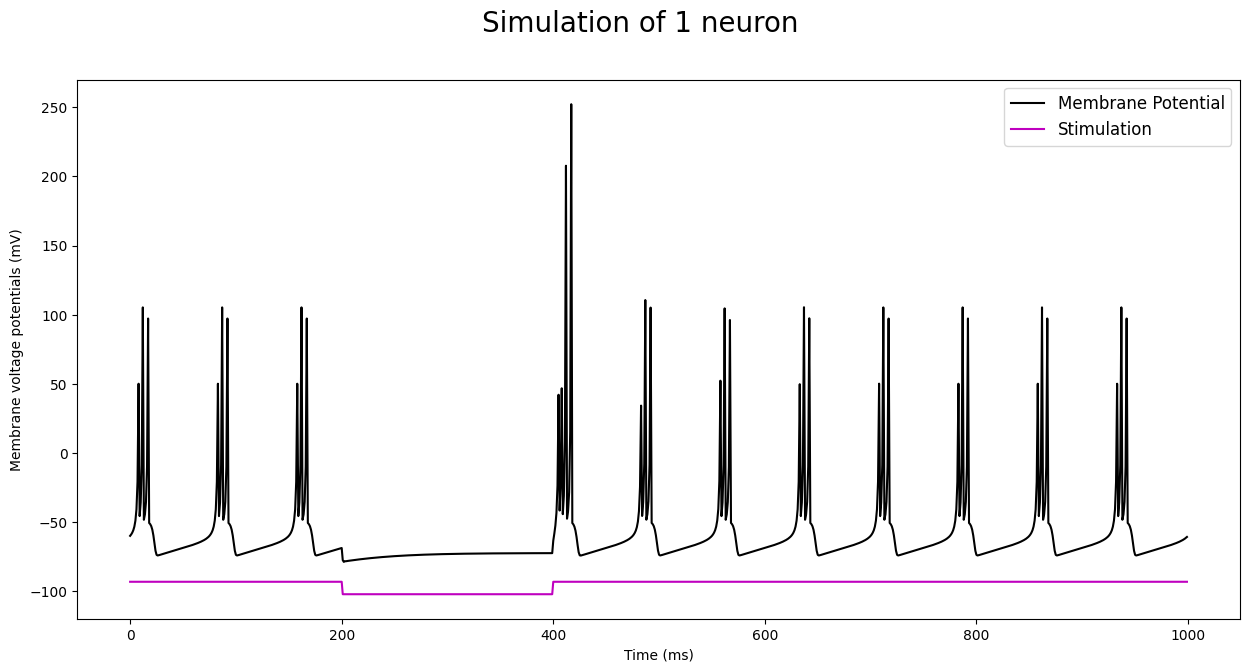

In [50]:
fig, ax = plt.subplots(1, figsize=(15,7))
ax.plot(membrane_voltage, 'k' ,label="Membrane Potential")
ax.plot(I_all-100, 'm', label="Stimulation")
fig.suptitle("Simulation of 1 neuron", fontsize=20)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane voltage potentials (mV)')
ax.legend(fontsize=12)
plt.show()

## Parameters for entire circuit (1000 neurons!)

In [3]:
# excitatory cells                          # inhibitory cells
Ne = 800;                                   Ni = 200
re = np.random.rand(Ne)**2;                 ri = np.random.rand(Ni) # random int
a = np.hstack((0.02*np.ones(Ne),            0.02 + 0.08*ri))   
b = np.hstack((0.2 * np.ones(Ne),           0.25 - 0.5 *ri))
c = np.hstack((-65 + 15 * re,               -65 * np.ones(Ni)))
d = np.hstack((8 - 6 * re,                  2 * np.ones(Ni)))
v = -65*np.ones(Ne + Ni) # common across both cell types
u = b*v # common across both cell types
S = np.hstack((0.5*np.random.rand(Ne + Ni, Ne), - np.random.rand(Ne + Ni, Ni)))

## Plotting $S$

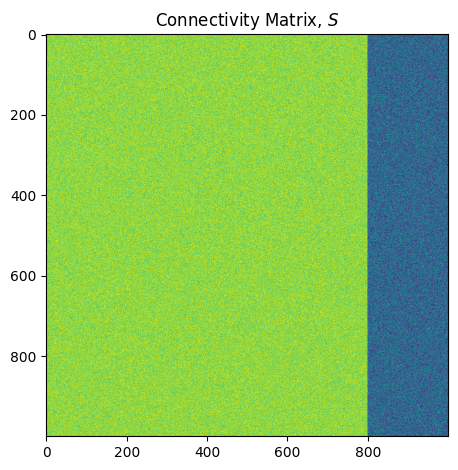

In [10]:
plt.imshow(S)
plt.title("Connectivity Matrix, $S$")
plt.tight_layout()
plt.show()

## Simulating the neural circuit

In [11]:
# create time
time = 5000 # ms

for i in range(time):
    # define I
    I = np.hstack((5*np.random.randn(Ne), 2*np.random.randn(Ni)))
    # check for activity (action potentials)
    fired = np.where(v>= 30)[0] # gives list of indices where v >= 30